In [9]:
import numpy as np
import json
from utilities import *
from OFDMparam import *
from CFOcorr import *
from getModFeat import *

import matplotlib.pyplot as plt
pi = math.pi


In [19]:
SNRVec = np.arange(0, 21, 2, dtype=int)
FFTsize = 4096
tauVec = np.array([64, 256, 512, 1024, 2048])
CPLenList = [[16, 8], [64, 32, 16], [128, 36], [72], [144]]
CPOptList = np.array([np.array(['Extended', 'Normal']),\
    np.array(['Extended', 'Medium', 'Normal']),\
    np.array(['Extended', 'Normal']),\
    np.array(['Normal']), np.array(['Normal'])], dtype=object)
protocolList = np.array(['wlanHT', 'wlanHE', 'NRDLa', 'NRDLb', 'NRDLc'])

In [3]:
f = open('/project/iarpa/dataset/cyclo_modul_OFDM/simulation/test/wlanHE_Extended_16_0_100_20_0.4_1.metadata')
loadMetadata = json.load(f)

MCSlist = getMCS_HEMU(loadMetadata)
print(MCSlist)

[3 3 3 3 3 3 3 3 3]


In [2]:
load_out = np.fromfile('/project/iarpa/dataset/cyclo_modul_OFDM/wlanHE_Extended_16qam/wlanHE_Extended_16_0_100_20_0.4_1.32cf',\
    dtype=np.float32)
data = load_out[np.arange(0, load_out.shape[0], 2)] +\
                    1j * load_out[np.arange(1, load_out.shape[0], 2)]

inputIQ = data[1200:]
print(inputIQ.shape[0])

6800


6000
161


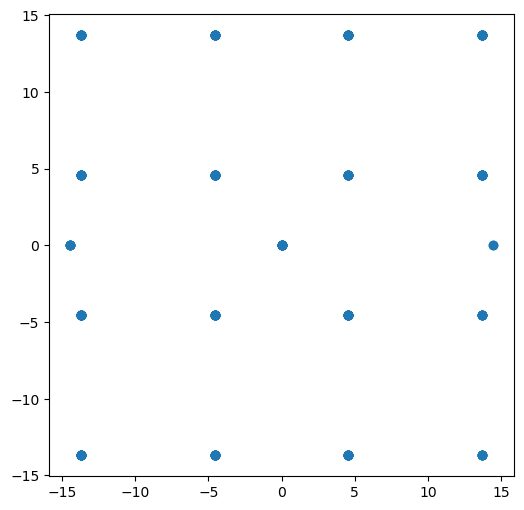

In [3]:
inputIQ = data[2000:]
print(inputIQ.shape[0])
nSubC = 256
lenCP = 64
samplingRate = 20e6
firstIndexSym = findFirstIndex(inputIQ, nSubC, lenCP)
firstIndexSym = firstIndexSym - 1
# print(firstIndexSym)
inputIQ_CFO = corrCFO(inputIQ, nSubC, lenCP, firstIndexSym, samplingRate, 2)
a = np.fft.fft(inputIQ_CFO[firstIndexSym+lenCP:firstIndexSym+lenCP+nSubC])

plt.figure(figsize=(6,6))
plt.scatter(np.real(a), np.imag(a))
# xylim = 4
# plt.xlim((-xylim, xylim))
# plt.ylim((-xylim, xylim))

(0.0, 12.0)

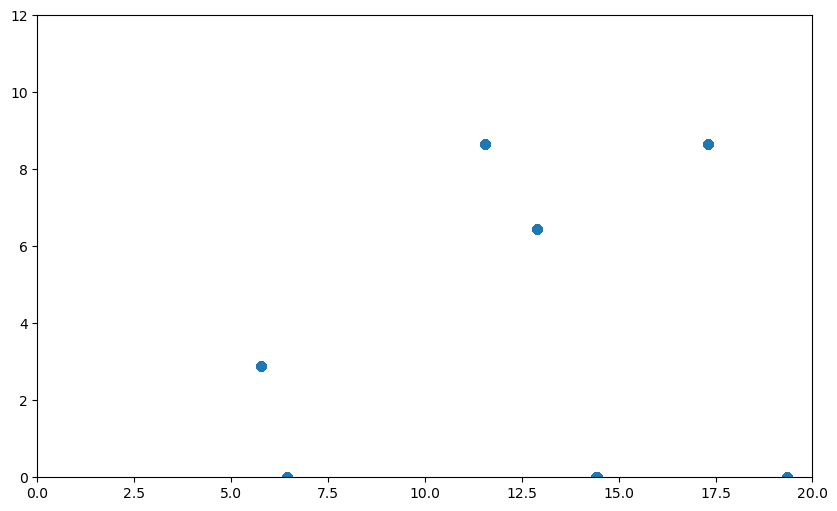

In [8]:
nSym = 15
removeNull = True
angleMod = True
feat = getModFeat(inputIQ_CFO, nSubC, lenCP, firstIndexSym, nSym, removeNull, angleMod)

plt.figure(figsize=(10,6))
plt.scatter(np.real(feat), np.imag(feat))
xylim = 20
plt.xlim((0, xylim))
plt.ylim((0, xylim*0.6))